# Support Vector Machine

SVM is a powerful supervised algorithm that **works best on smaller datasets** but on complex ones. 

Support Vector Machine, abbreviated as **SVM** can be used for both regression and classification tasks, but generally, they work best in classification problems. They were very famous around the time they were created, during the 1990s, and keep on being the go-to method for a high-performing algorithm with a little tuning.

## Types
Types of Support Vector Machine (SVM) Algorithms

- **Linear SVM:** When the data is perfectly linearly separable only then we can use Linear SVM. Perfectly linearly separable means that the data points can be classified into 2 classes by using a single straight line(if 2D).
- **Non-Linear SVM:** When the data is not linearly separable then we can use Non-Linear SVM, which means when the data points cannot be separated into 2 classes by using a straight line (if 2D) then we use some advanced techniques like kernel tricks to classify them. In most real-world applications we do not find linearly separable datapoints hence we use kernel trick to solve them.

## Kernels
The most interesting feature of SVM is that it can even work with a non-linear dataset and for this, we use “Kernel Trick” which makes it easier to classifies the points.

- Polynomial Kernel
- Sigmoid
- RBF
- Bassel Function

### Choosing Right Kernel

Choosing a kernel totally depends on what kind of dataset are you working on. 
If it is linearly separable then you must opt. for linear kernel function since it is very easy to use and the complexity is much lower compared to other kernel functions. 

I’d recommend you start with a hypothesis that your data is linearly separable and choose a linear kernel function.

# Implement SVM

**Dataset**

https://www.kaggle.com/datasets/lodetomasi1995/income-classification

In [30]:
## Data Set
# https://www.kaggle.com/datasets/lodetomasi1995/income-classification

In [31]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
# Read data

df = pd.read_csv('DataSet/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
df.shape

(32561, 15)

In [34]:
df.drop(columns=' fnlwgt',inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    education       32561 non-null  object
 3    education-num   32561 non-null  int64 
 4    marital-status  32561 non-null  object
 5    occupation      32561 non-null  object
 6    relationship    32561 non-null  object
 7    race            32561 non-null  object
 8    sex             32561 non-null  object
 9    capital-gain    32561 non-null  int64 
 10   capital-loss    32561 non-null  int64 
 11   hours-per-week  32561 non-null  int64 
 12   native-country  32561 non-null  object
 13   income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [36]:
col_names = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

#### Data Preprocessing

In [37]:
# adding new the categorical column
bins = [16, 24, 64, 90]
labels = ["young","adult","old"]
df['age_types'] = pd.cut(df['age'], bins=bins, labels=labels)
df['income_num'] = np.where(df['income'] == ' >50K', 1, 0).astype('int16')
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


In [38]:
np.unique(df.education)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [39]:
strip_columns = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']

for col in strip_columns:
    df[col] = df[col].str.strip()

In [40]:
# categorical and numerical fields
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [41]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


For more Exploratory analysis : visit: https://github.com/AnshulSaini17/Income_evaluation/blob/main/Income_Evalutation.ipynb

In [42]:
# outliers
abc = df.loc[df['capital_gain']>90000,'capital_gain'].index
df.drop(index=abc,inplace=True)

temp_3 = df.loc[df['capital_loss']>4000,'capital_loss'].index
df.drop(index=temp_3,inplace=True)

#### Correlation between features

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

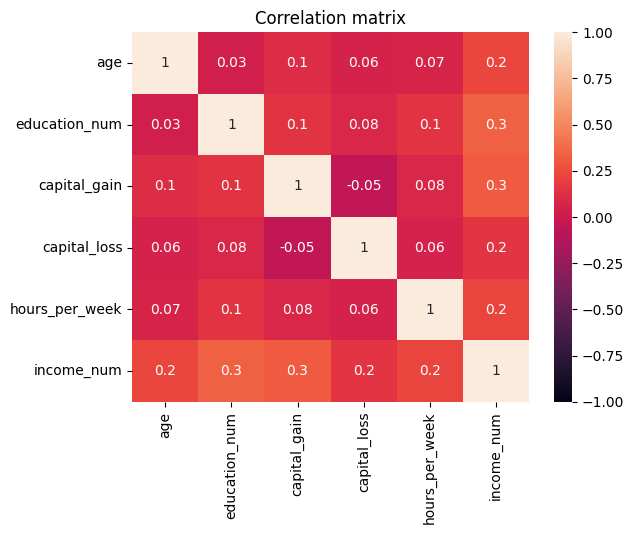

In [44]:
corr = df.corr(numeric_only=True)
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()


### Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])


label_list = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income','age_types']
for i in label_list:
    label_encoder(i)

df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0,0,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0,0,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0,0,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0,0,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0,0,0


### Normalization

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df.drop(['income','age_types','income_num'],axis=1))
scaled_features = scaler.transform(df.drop(['income','age_types','income_num'],axis=1))

columns = ['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']

df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.875,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.052626,0.0,0.397959,0.951220
1,0.452055,0.750,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.122449,0.951220
2,0.287671,0.500,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.000000,0.0,0.397959,0.951220
3,0.493151,0.500,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.000000,0.0,0.397959,0.951220
4,0.150685,0.500,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.397959,0.121951


### Model Building

In [48]:
X = df_scaled
y= df.income

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101,shuffle=True)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (25919, 13)
X_test shape: (6480, 13)
y_train shape: (25919,)
y_test shape: (6480,)


In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.8456345665316098
Test Score: 0.8496913580246913


In [51]:
# Hyperparameterizing
from sklearn.model_selection import GridSearchCV

grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))